# Classifying green canopy cover

In this tutorial we will learn how to quantify the percent of green canopy cover from downward-facing digital images taked with a point-and-shoot camera or mobile device.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


In [2]:
# Remove "Divide by zero" warning
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [8]:
# Navigate to directory and read list of image files

glob.os.chdir('/Users/andrespatrignani//Dropbox/Teaching/Scientific programming/pynotes/datasets/canopy_cover')

# There are four images in the canopy_cover folder
img_files = glob.glob('*.jpg')
print(img_files)


['alfalfa.jpg', 'corn_tillage.jpg', 'grassland.jpg', 'wheat_no_tillage.jpg']


## Read and process a single image


In [9]:
#Read image
original_img = mpimg.imread(img_files[0])


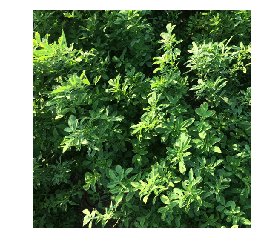

In [10]:
# Display image
plt.imshow(original_img)
plt.axis('off')
plt.show()

In [11]:
# Inspect shape
original_img.shape

(512, 512, 3)

The image is simply a grid of pixels. For instance, this particular image has 512 rows and 512 columns. It also has 3 bands, corresponding to the red, blue, and green bands.

Most color images are composed of three bands, but some images have a fourth band for opacity.

In [16]:
# Inspect data type of image
original_img.dtype

# If you have images in .PNG format, Matplotlib already imports images as floats fo 32 bits 
# (single precision floats).

dtype('uint8')

In [15]:
#Convert data from integer to float. A float can be single or double precision. 
# In this case I will use single precision. 

# This step is necessary to make arithmetic operations
rgb = np.single(original_img)

print(rgb.dtype)


float32


In [17]:
#Extract data in separate variable for easier manipulation.
red = rgb[:, :, 0] #Extract matrix of red pixel values into a separate array (so it is easier to manipulate them from now on, m x n array)
green = rgb[:, :, 1] #Extract matrix of green pixel values into a separate array (m x n).
blue = rgb[:, :, 2] #Extract matrix of blue pixel values into a separate array (m x n).


In [19]:
# Compare shape with original image
print(red.shape)

# In this case we only have a single band, the red band

(512, 512)


In [21]:
red_green = np.divide(red, green) #Calculate red to green ratio for each pixel. The result is an m x n array.
blue_green = np.divide(blue, green) #Calculate blue to green ratio for each pixel. The result is an m x n array.
classified_img = np.logical_and(red_green < 0.95, blue_green < 0.95, green > 10) #Classification of green pixels

print(classified_img.shape)

(512, 512)


See that we started with an m x n x 3 (original image) and we finished with and m x n x 2 (binary or classified image)

In [22]:
# Compute canopy cover
percent_cc = np.float(np.sum(classified_img)) / np.float(np.size(classified_img)) * 100 #Calculate percent canopy cover

print('Green canopy cover:',round(percent_cc,2),' %')

Green canopy cover: 98.92  %


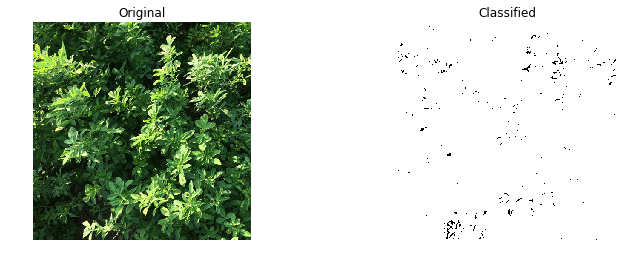

In [23]:
#Create subplots containing the original and binary images
fig = plt.figure(figsize=(12,4))
fig.tight_layout()
left_img = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(original_img)
left_img.set_title('Original')
left_img.axis('off')

right_img = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(classified_img, cmap='gray') # or 'Green'
right_img.set_title('Classified')
right_img.axis('off')
plt.show()

## Assignment
In this tutorial we analyzed a single picture. Based on your knowledge about functions create a short code that automates the processing of the small batch of four images in the folder. The function does not need to plot the images, just the name and percent of green canopy cover for each image.

## References

Patrignani, A. and Ochsner, T.E., 2015. Canopeo: A powerful new tool for measuring fractional green canopy cover. Agronomy Journal, 107(6), pp.2312-2320.